In [1]:
import numpy as np
##import csv
elArray = np.genfromtxt('student_admission.txt',delimiter=',')
##elArray

##SACO DEL DATASET LOS FEATURES. EN ESTE CASO ESTOY PIDIENDO DE FILAS, TODO (NO HAY HEADERS EN ESTE DATASET)
##Y TOMO DE LA COL A LA 1 PORQUE SON DOS COLUMNAS DE FEATURES
X = elArray[:,0:2]
##ARMO EL TARGET DE ENTRENAMIENTO. SON TODAS LAS FILAS (NO HAY HEADERS) Y SOLO LA COLUMNA 3 (LA 2 XQ CUETNA DESDE CERO)
y = elArray[:,2]
X.shape

(100, 2)

In [2]:
from sklearn.model_selection import train_test_split
###VOY A SEPARAR LOS DATASETS EN SETS DE ENTRENAMIENTO Y DE TESTEO. 
###VOY A GUARDAR EL 30% DE LOS REGISTROS PARA TESTEO LUEGO DEL ENTRENAMIENTO
###FIJO EL RANDOM STATE PARA QUE ME DE SIEMPRE EL MISMO RESULTADO, BLOQUEA EL RANDOMIZADOR DEL ORDENADOR
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

In [3]:
X_train.shape

(70, 2)

In [4]:
##VOY A HACER UN NB GAUSSIANO PORQUE LOS FEATURES SON CONTINUOS NO CATEGORICOS, SON NOTAS CON MUCHOS DECIMALES, PARECE
####ES GAUSSIANA
from sklearn.naive_bayes import GaussianNB
##PREPARO EL MODELO? 
model = GaussianNB()
##FITEO LOS DATOS, LE PASO LOS FEATURES O PREDICTORES Y LOS TARGET. EL FIT HACE EL ENTRENAMIENTO
model.fit(X, y)

GaussianNB(priors=None)

In [5]:
##VOY A PROBAR CON EL TEST LA ACCURACY DE PREDICCION QUE TIENE EL MODELO
##LO QUE HAGO ES PASAR AL MODELO LOS PREDICTORES QUE GUARDÉ PARA TESTEAR (30% EN ESTE CASO)
##EN LA LISTA Y_PRED, ELMODELO ME DEVUELVE LAS PREDICCIONES O LOS TARGET UE CALCULÓ, ESO ES Y_PRED
y_pred =model.predict(X_test)
y_pred

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.])

In [6]:
X_test

array([[88.91389642, 69.8037889 ],
       [80.366756  , 90.9601479 ],
       [52.04540477, 69.43286012],
       [94.83450672, 45.6943068 ],
       [74.49269242, 84.84513685],
       [67.94685548, 46.67857411],
       [33.91550011, 98.86943574],
       [67.31925747, 66.58935318],
       [66.74671857, 60.99139403],
       [66.56089447, 41.09209808],
       [55.48216114, 35.57070347],
       [34.18364003, 75.23772034],
       [97.64563396, 68.86157272],
       [90.54671411, 43.39060181],
       [99.27252693, 60.999031  ],
       [52.10797973, 63.12762377],
       [85.40451939, 57.05198398],
       [51.04775177, 45.82270146],
       [60.45555629, 42.50840944],
       [95.86155507, 38.22527806],
       [35.84740877, 72.90219803],
       [60.45788574, 73.0949981 ],
       [99.31500881, 68.77540947],
       [56.2538175 , 39.26147251],
       [76.97878373, 47.57596365],
       [54.63510555, 52.21388588],
       [89.84580671, 45.35828361],
       [93.1143888 , 38.80067034],
       [77.19303493,

In [7]:
##ASI PASO UNA PREDICCION SUELTA:
prediccion = model.predict([[75,46]])
prediccion

array([1.])

In [8]:
a=75
y=(a,46)
prediccion = model.predict([y])
prediccion

array([1.])

In [52]:
import pickle
list_pickle_path = 'modelo2.pkl'
 
# Create an variable to pickle and open it in write mode
list_pickle = open(list_pickle_path, 'wb')
pickle.dump(model, list_pickle)
list_pickle.close()

In [22]:
##EL METODO ACCURACY SCORE BASICAMENTE ME COMPARA LOS TARGET QUE GUARDÉ DE TESTEO (30%) Y LOS COMPARA CON LOS QUE PREDIJO Y_PRED
##ESTO DEVUELVE EL % DE ACIERTOS QUE TUVO
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [27]:
##ESTO NO SE QUE HACE, PERO EVIDENTEMENTE ESTÁ TIRANDO INDICADORES DE CALIDAD. PREGUNTAR QUÉ ES CADA UNO?
##DA VALORES PARA CADA TIPO DE TARGET???
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.92      0.86      0.89        14
        1.0       0.88      0.94      0.91        16

avg / total       0.90      0.90      0.90        30



In [29]:
##ESTO ME AHCE LA MATRIZ DE CONFUSION. COMO PUEDO PONERLE LOS HEADERS?
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[12  2]
 [ 1 15]]


In [34]:
##PREGUNTAR: ES EL EJE X LO PREDECIDO, O SEA LO SEGUNDO QUE LE PASO A LA MATRIZ O ES AL REVES????
laMatriz = confusion_matrix(y_test,y_pred)

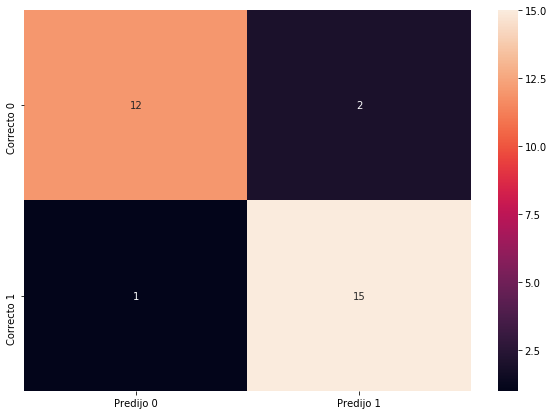

In [42]:
##GRAFICO LA MATRIZ DE CONFUSION CON MAS CALIDAD
##IMPORTO LAS LIBRERIAS QUE VOY A USAR:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

##ARMO EL OBJETO, PRIMERO LE PASO EL ARRAY, SEGUNDO LOS PASO EL INDEX DE FILAS Y TERCERO LAS COLUMNAS
df_cm = pd.DataFrame(laMatriz, index = ["Correcto 0", "Correcto 1"],
                  columns = ["Predijo 0", "Predijo 1"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
## ESTO RECORRE EL STRING Y PONE DE A UN CHARCTER X FILA O COL: index = [i for i in "ABCD"]
##PUEDO PASARLE UNA LISTA PARECE, ASÍ: index = ["OPCION A","OPCION B"]

In [31]:
##ERROR CUADRÁTICO???? CÓMO SE INTEPRETA?
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.1

In [33]:
##Y ESTO????? R CUADRADO?????
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5982142857142857